In [1]:
import pandas as pd
#Load cryotherapy Dataset into a pandas dataframe
listing = pd.read_csv('listings.csv',header=0, low_memory=False)

In [2]:
listing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.610820,-122.290820,Entire home/apt,296,7,31,2019-12-02,0.23,2,75
1,5682,"Cozy Studio, min. to downtown -WiFi",8993,Maddy,Delridge,South Delridge,47.523980,-122.359890,Entire home/apt,48,3,462,2018-11-24,3.89,1,1
2,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.654110,-122.337610,Entire home/apt,90,30,150,2019-09-28,1.18,3,0
3,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.550620,-122.320140,Private room,62,2,147,2019-11-21,1.29,7,360
4,9460,Downtown Convention Center B&B -- Free Minibar,30832,Siena,Downtown,First Hill,47.612650,-122.329360,Private room,79,3,457,2019-12-07,3.64,4,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,40914077,"Elegant Tangerine Room, 10 min drive to downtown",276362222,Jean,University District,University District,47.666760,-122.316830,Private room,25,1,0,NaN,NaN,6,69
7964,40925157,"✨Beautiful, 2 Bedroom Apt for 1-8 guests @Down...",130366604,Logan,Downtown,First Hill,47.611335,-122.330423,Entire home/apt,179,3,0,NaN,NaN,8,171
7965,40925501,Bright & Minimal Downtown Studio,297257820,David,Downtown,First Hill,47.611335,-122.330423,Entire home/apt,119,3,0,NaN,NaN,1,177
7966,40926115,"Cozy, Bright Downtown Studio",130366604,Logan,Cascade,South Lake Union,47.618691,-122.346917,Entire home/apt,119,1,0,NaN,NaN,8,169


In [3]:
listing.drop(['id','name','host_name','host_id','last_review','latitude','longitude','neighbourhood',
              'calculated_host_listings_count','availability_365'], axis=1, inplace=True)

In [4]:
listing_clean = listing.fillna(0)

In [5]:
#Encode the input Variables
def Encode(listing_clean):
    for column in listing_clean.columns[listing_clean.columns.isin(['neighbourhood_group', 'room_type'])]:
        listing_clean[column] = listing_clean[column].factorize()[0]
    return listing_clean

listing_en = Encode(listing_clean.copy())

In [6]:
listing_en

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
0,0,0,296,7,31,0.23
1,1,0,48,3,462,3.89
2,2,0,90,30,150,1.18
3,2,1,62,2,147,1.29
4,3,1,79,3,457,3.64
...,...,...,...,...,...,...
7963,15,1,25,1,0,0.00
7964,3,0,179,3,0,0.00
7965,3,0,119,3,0,0.00
7966,7,0,119,1,0,0.00


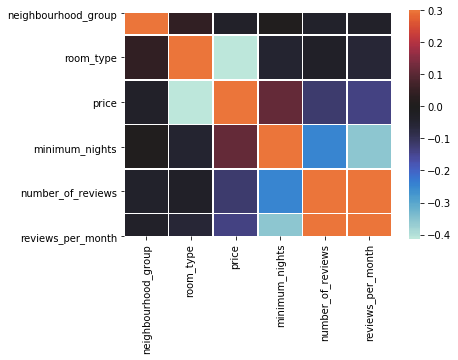

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = listing_en.corr(method='kendall')
plt.figure(figsize=(6,6))
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#Defining the independent variables and dependent variables
x = listing_en.iloc[:,[0,1,3,4,5]]
y = listing_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month
7005,0,0,1,35,6.91
4956,5,0,30,100,5.59
2722,0,0,30,4,0.12
7575,2,0,1,8,3.38
6426,3,0,2,2,0.28
...,...,...,...,...,...
3381,5,0,2,12,0.46
4291,4,0,2,35,2.79
651,0,0,30,134,2.07
2810,3,0,3,93,2.73


In [10]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [11]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ -2.20956174 -59.11264759  -0.52270649  -0.09931294 -19.24149863]
Mean squared error: 24988.32
Coefficient of determination: 0.06


In [12]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred.flatten()})
error_airbnb

,Actual Values,Predicted Values
0,255,233.071335
1,200,149.600781
2,970,147.443946
3,300,243.361937
4,79,123.420641
...,...,...
792,250,230.849246
793,19,63.989648
794,274,233.071335
795,90,172.449866


[]

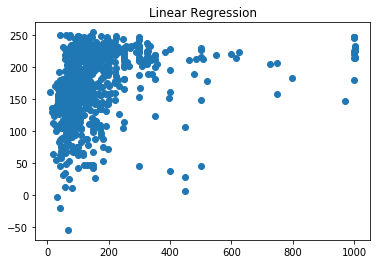

In [13]:
plt.scatter(y_test, y_pred)
plt.title('Linear Regression')
plt.plot(color='blue', linewidth=3)

[Text(0, 0.5, 'Predicted Price'), Text(0.5, 0, 'Actual Price')]

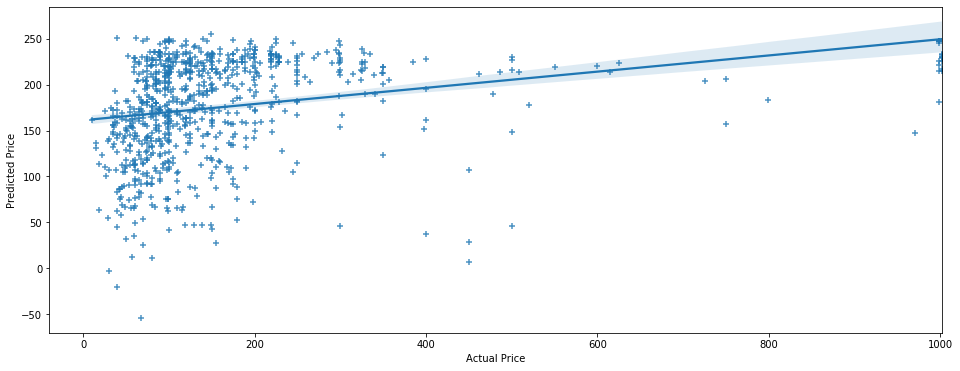

In [14]:
plt.figure(figsize=(16, 6))
ax = sns.regplot(x=y_test, y=y_pred, marker="+")
ax.set(xlabel='Actual Price', ylabel='Predicted Price')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model
import numpy as np

# Predictor: independent variable
# Target: dependent variable
def feature_combination(data, predictor, target):
    # Divide the dataset into training and testing sets
    X_train,X_test,y_train,y_test=train_test_split(listing_en.iloc[:,predictor],target,test_size=.1,random_state=353)
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr = regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The mean squared error
    mean_squared_error = np.mean((y_pred - y_test) ** 2)
    
    return (mean_squared_error, predictor, target)
     
smallest_mean_squared_error = 100000000
best_predictor = []
predictor_set = [[0],[1],[3],[4],[5],[0,1],[0,3],[0,4],[0,5],[1,3],[1,4],[1,5],[3,4],[3,5],[4,5],
                [0,1,3],[0,1,4],[0,1,5],[0,3,4],[0,3,5],[0,4,5],[1,3,4],[1,3,5],[3,4,5],[0,1,3,4],
                 [0,1,3,5],[0,1,4,5],[0,3,4,5],[1,3,4,5],[0,1,3,4,5]]
# Compare results to get the best combination of features, which has the smallest mean squared error
for i in range(30):
    (mean_squared_error, predictor, target) = feature_combination(listing_en, predictor_set[i], listing_en['price'])
    print(listing_en.iloc[:,predictor_set[i]].columns)
    print(mean_squared_error)
    if mean_squared_error < smallest_mean_squared_error:
        smallest_mean_squared_error = mean_squared_error
        best_predictor = predictor
        #best_target = target
        
# Plot the best overall linear regression model with the best combination of features found above
print("best_predictor: ", best_predictor)

Index(['neighbourhood_group'], dtype='object')
26614.079910173434
Index(['room_type'], dtype='object')
25861.186355805312
Index(['minimum_nights'], dtype='object')
26705.292591247417
Index(['number_of_reviews'], dtype='object')
26305.25903074731
Index(['reviews_per_month'], dtype='object')
26142.693730060048
Index(['neighbourhood_group', 'room_type'], dtype='object')
25756.22929030686
Index(['neighbourhood_group', 'minimum_nights'], dtype='object')
26571.32949922006
Index(['neighbourhood_group', 'number_of_reviews'], dtype='object')
26150.08397195678
Index(['neighbourhood_group', 'reviews_per_month'], dtype='object')
25961.959013666266
Index(['room_type', 'minimum_nights'], dtype='object')
25807.69837184096
Index(['room_type', 'number_of_reviews'], dtype='object')
25430.64737677164
Index(['room_type', 'reviews_per_month'], dtype='object')
25144.69789944753
Index(['minimum_nights', 'number_of_reviews'], dtype='object')
26335.80398510231
Index(['minimum_nights', 'reviews_per_month'], dty

In [16]:
#Defining the independent variables and dependent variables
x = listing_en.iloc[:,[0,1,4,5]]
y = listing_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)